# This notebook performs Exploratory Data Analysis of the Cleaned Data




## Load Modules

In [58]:
import os

# Supress Warnings
import warnings

warnings.filterwarnings("ignore")

from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Grab Environment Variables 

In [59]:
# Load environment variables from .env
load_dotenv()

True

In [60]:
# Get RAW csv data
CLEAN_DATA_PATH = os.environ.get("CLEAN_DATA_PATH")

### Load the Cleaned Dataset into Pandas DataFame 

In [61]:
df = pd.read_csv(CLEAN_DATA_PATH)

### Creating EDA Related Functions

* plotting functions
    * plot_histogram_boxplots
    * plot_labeled_barplot
    * plot_stacked_barplot



In [62]:
def plot_histogram_boxplots(
        data: pd.DataFrame,
        feature: str,
        figsize: tuple[int, int] = (12,7),
        kde: bool = False,
        bins: None | int = None,
        hue: None | str = None,
) -> sns.axisgrid.FacetGrid | None:
    """Boxplot and Histogram combined

    Args:
        data (pd.DataFrame): dataframe
        feature (str): specific column of the dataframe
        figsize (tuple[int, int]): size of the figure. default = (12,7)
        kde (None | bool): whether to show the density curve default = False
        bins (None | int): number of bins for the histogram. default = None
        hue  (None | str): the variable to use for coloring features. 

    Returns:
        sns.axisgrid.FacetGrid: returns a Seaborn figure
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if (bins) and (hue):
        sns.histplot(
            data=data,
            x=feature,
            kde=kde,
            ax=ax_hist2,
            hue=hue,
            bins=bins,
            color="mediumpurple",
        )
    elif bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple"
        )
    elif hue:
        sns.histplot(
            data=data, x=feature, kde=kde, hue=hue, ax=ax_hist2, color="mediumpurple"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple"
        )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    return None


In [63]:
def plot_labeled_barplot(
        data: pd.DataFrame,
        feature: str,
        perc: bool = False,
        n: None | int = None
) ->  None:
    """Create labeled barplots with percentage at the top

    Args:
        data (pd.DataFrame): dataframe
        feature (str): specific column of the dataframe
        perc (bool): whether to display percentages instead of count (default is False)
        n (None | int, optional): displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    return None

In [64]:
def plot_stacked_barplot(
        data: pd.DataFrame,
        predictor: str,
        target: str,
) ->  None:
    """Plot stacked bar chart. Print the category counts and plot a stacked bar chart

    Args:
        data (pd.DataFrame): dataframe
        predictor (str): independent variable
        target (str): target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

    return None

## Data Profile

Digging into the data


### Performing First Univariate Analysis

##### Analysis: Credit Scores

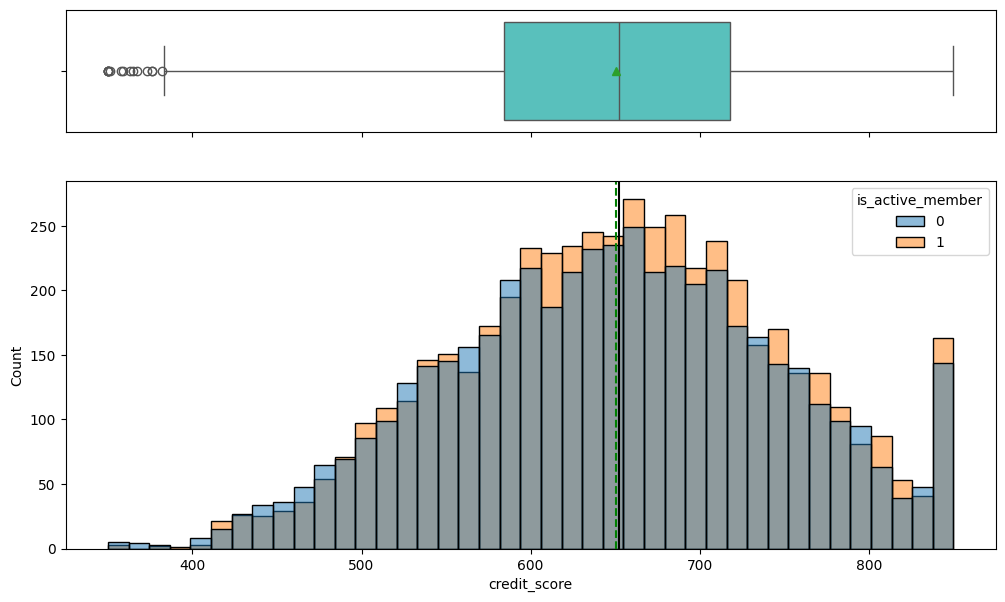

In [65]:
plot_histogram_boxplots(df, "credit_score", hue="is_active_member")

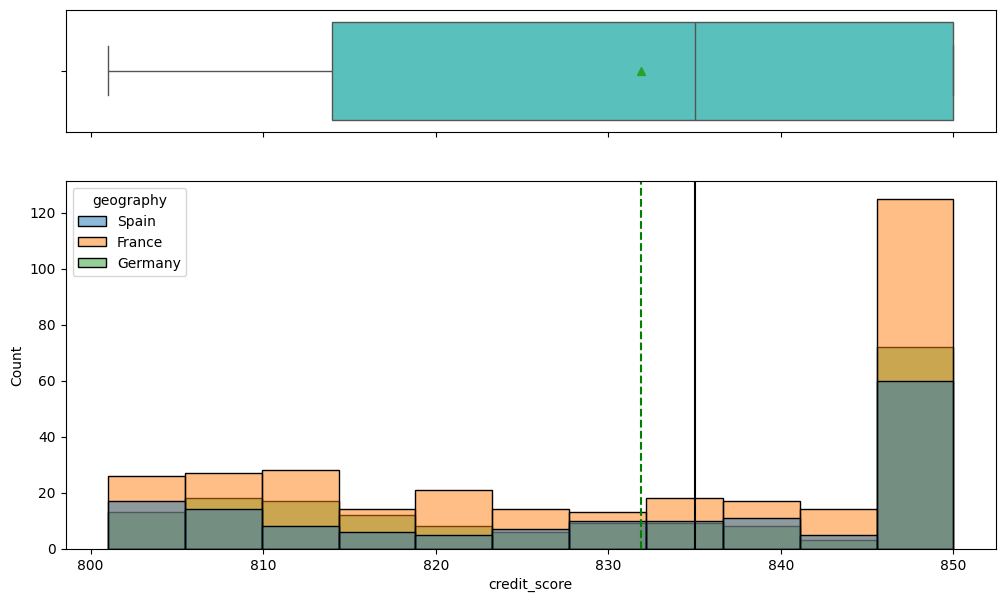

In [66]:
# Location of customers witht he highest credit score
highscore_customers = df.loc[df["credit_score"] > 800]
plot_histogram_boxplots(highscore_customers, "credit_score", hue="geography")

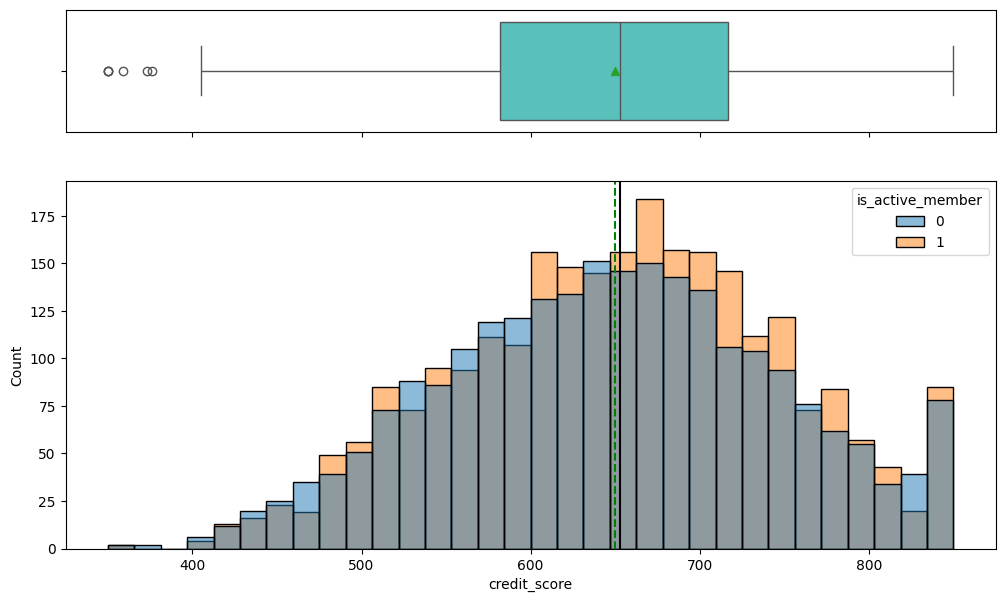

In [67]:
# French customers
french_customers = df.loc[df["geography"] == "France"]
french_customers.head(2)
plot_histogram_boxplots(french_customers, "credit_score", hue="is_active_member")

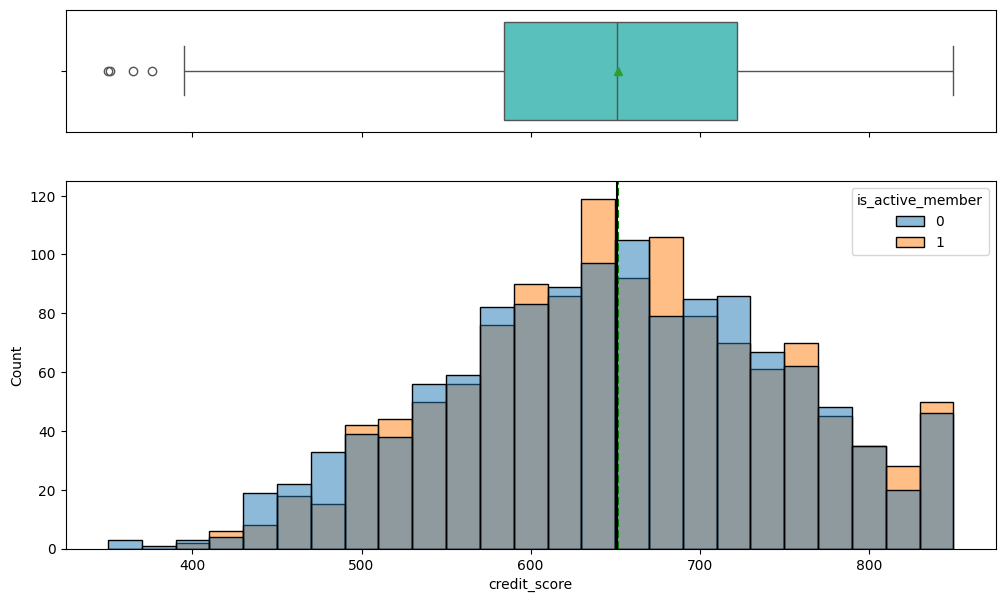

In [68]:
# Germany customers
germany_customers = df.loc[df["geography"] == "Germany"]
plot_histogram_boxplots(germany_customers, "credit_score", hue="is_active_member")

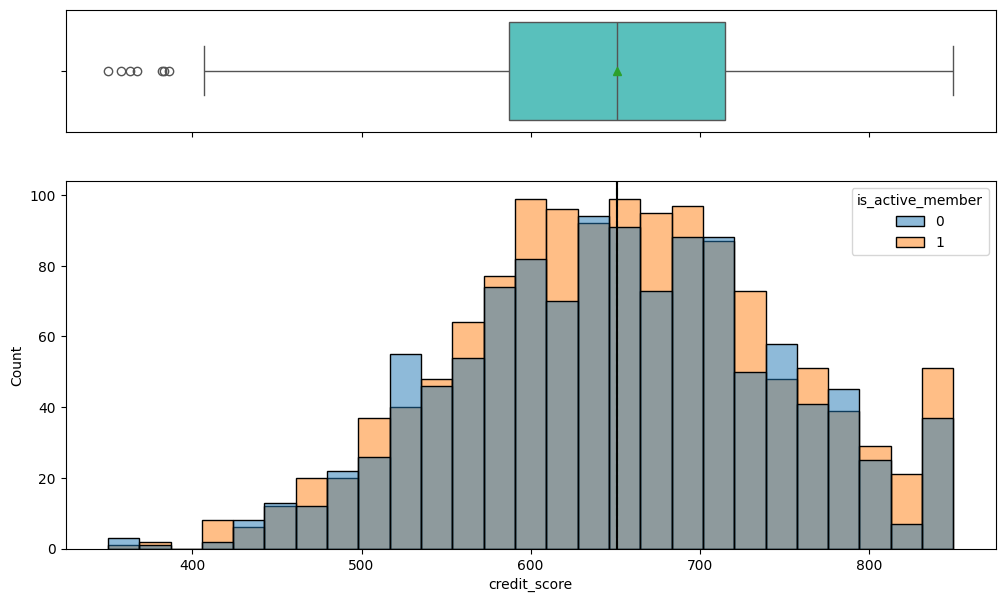

In [69]:
# Spanish customers
spanish_customers = df.loc[df["geography"] == "Spain"]
plot_histogram_boxplots(spanish_customers, "credit_score", hue="is_active_member")

`credit_score` Observations

It is left-skewed. 
* minimum score is 350
* max score is 850
* mean is 650

* France has the largest number of users with credit card stores > 800


The features:

- **Has_credict_card:** Customer is or is not a credit card holder
  - **0=no**: Label (Customer does not have a credit card)
  - **1=yes** Label (Customer does have a credit card)


##### Looking at the Distribution of High Credit Score Customers and those Who Have Churned
* The number of high score customers is similarly distributed between 800 and 850 with a higher count closer to 850.
* The higher the credit scores the the more customers did not exit (exited = 0)
* It is good idea to understand from a business perspective how to ensure these high credit scores customers do not exit/churn.

--

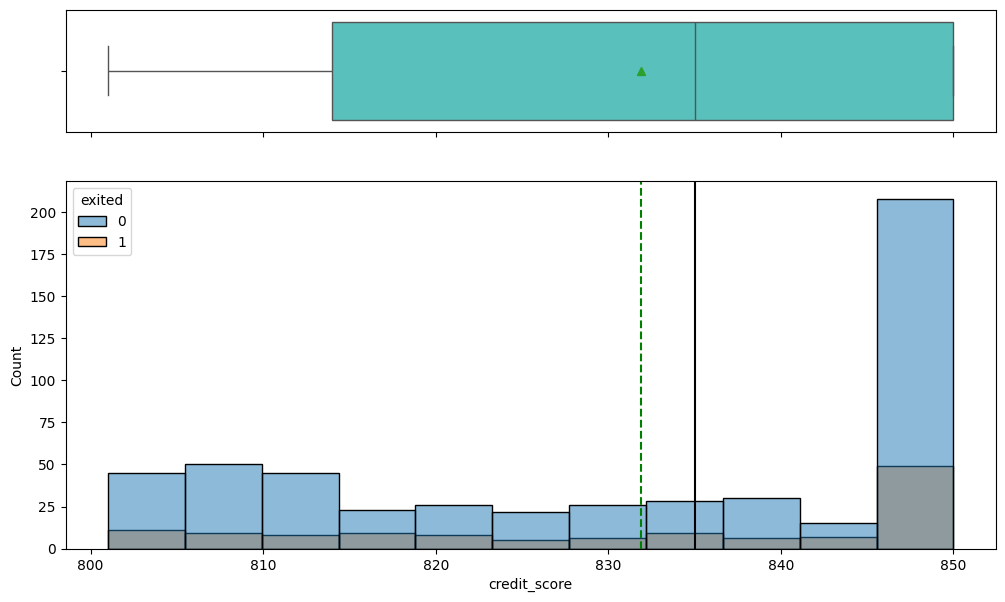

In [70]:
# High Credit Score customers that have churned
plot_histogram_boxplots(highscore_customers, "credit_score", hue="exited")

### Breaking Down Customers in Churned Customers and Current (Non-churned) Customers

Percentage of Customers Churned = 20.37%

Percentage of Current Customers =  79.63%

So about 1/5th of the customers have churned.

#### Exclude Customers that have Already Churned to see Active breakdown

**is_active_member:** Is the customer active and regularly engaged with bank services
  - **0=no**: Label (Customer not active)
  - **1=yes** Label (Customer was active)

Here, I am excluding customers that have already dropped bank services, so I can better assess from the reaming customers which ones are still Active.

From the barplot:

Percentage of Current Not Active Customers = 44.54%

Percentage of Current Active Customers =  55.46%

So ~55% of current customers are active, which emphasizes the need to improve since about 44.54% of current customers are not active.


In [71]:
total_exited = df.exited[df["exited"] == 1].count() + df.exited[df["exited"] == 0].count()
churn_percentage = (df.exited[df["exited"] == 1].count() / total_exited) * 100
current_percentage = (df.exited[df["exited"] == 0].count() / total_exited) * 100

print(f"Percentage of Customers Churned = {churn_percentage:.2f}")
print(f"Percentage of Current Customers = {current_percentage: .2f}")

Percentage of Customers Churned = 20.37
Percentage of Current Customers =  79.63


exited
0    7963
1    2037
Name: count, dtype: int64


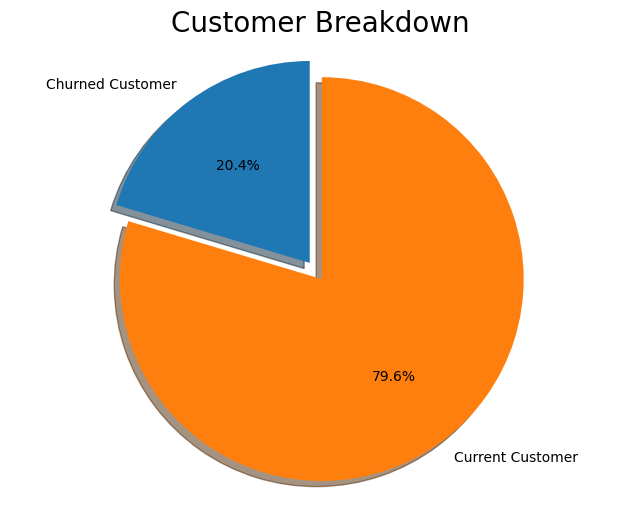

In [72]:
print(df.exited.value_counts())
labels = "Churned Customer", "Current Customer"
sizes = [
    df.exited[df["exited"] == 1].count(),
    df.exited[df["exited"] == 0].count(),
]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(
    sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90
)
ax1.axis("equal")
plt.title("Customer Breakdown", size=20)
plt.show()

#### Exclude Customers that have Already Churned to see Active breakdown

**is_active_member:** Is the customer active and regularly engaged with bank services
  - **0=no**: Label (Customer not active)
  - **1=yes** Label (Customer was active)

Here, I am excluding customers that have already dropped bank services, so I can better assess from the reaming customers which ones are still Active.

From the barplot:

Percentage of Current Not Active Customers = 44.54%

Percentage of Current Active Customers =  55.46%

So ~55% of current customers are active, which emphasizes the need to improve since about 44.54% of current customers are not active. 

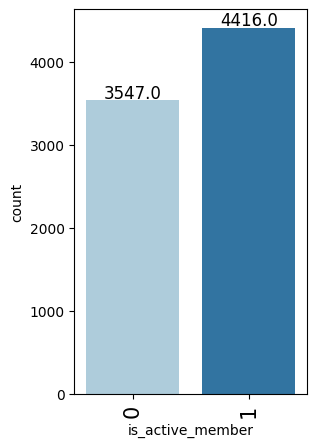

In [73]:
# How active are our current customers?
current_customers = df.loc[
    df["exited"] == 0
]  # excluding former customers

plot_labeled_barplot(current_customers, "is_active_member")

In [74]:
count = current_customers["is_active_member"].nunique()
current_active, current_not_active = current_customers["is_active_member"].value_counts()

total_current = current_active + current_not_active
not_active_percentage = (current_not_active / total_current) * 100
active_percentage = (current_active / total_current) * 100

print(f"Percentage of Current Not Active Customers = {not_active_percentage:.2f}")
print(f"Percentage of Current Active Customers = {active_percentage: .2f}")

Percentage of Current Not Active Customers = 44.54
Percentage of Current Active Customers =  55.46


#### Taking a Closer Look at the Existing Customers that Are Churning. 

##### Does Gender play a Role in Churning

**Result:**

* Slighty more of the customers churning are Female

exited     0     1    All
gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


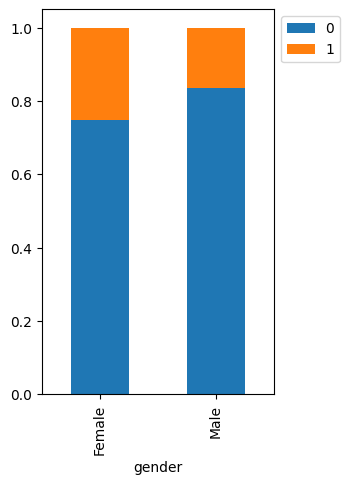

In [75]:
# Gender versus customers churning
plot_stacked_barplot(df, "gender", "exited")

##### Does Geography play a Role in Churning

**Result:**

* More customers churning in Germany, with France and Spain relatively equal

exited        0     1    All
geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


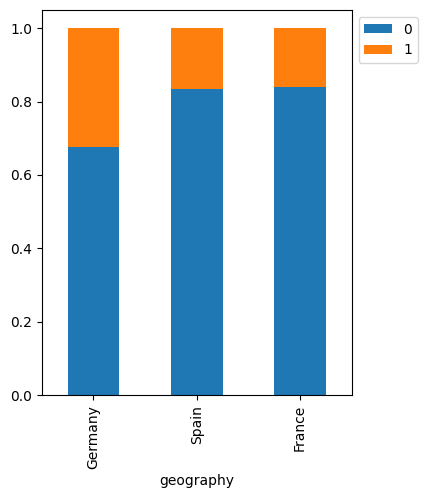

In [76]:
# Country versus customers churning
plot_stacked_barplot(df, "geography", "exited")

--

# Bivariate (Multiple Feature Analysis)

In this section, I explore correlations between features and explore feature combinations.

### Results:

* There were no strong linearly correlations either negative or positive
* Of particular note
    * There is a negative linearly correlation between `exited` and `is_active_member`
    * There is a negative linearly correlation between `num_of_products` and `balance`

* Most customers are younger customers as `age` skews younger
* Older customers with higher products have the largest churn population

--

##### Correlations

In [77]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print(num_cols)

['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_credit_card', 'is_active_member', 'estimated_salary', 'exited']


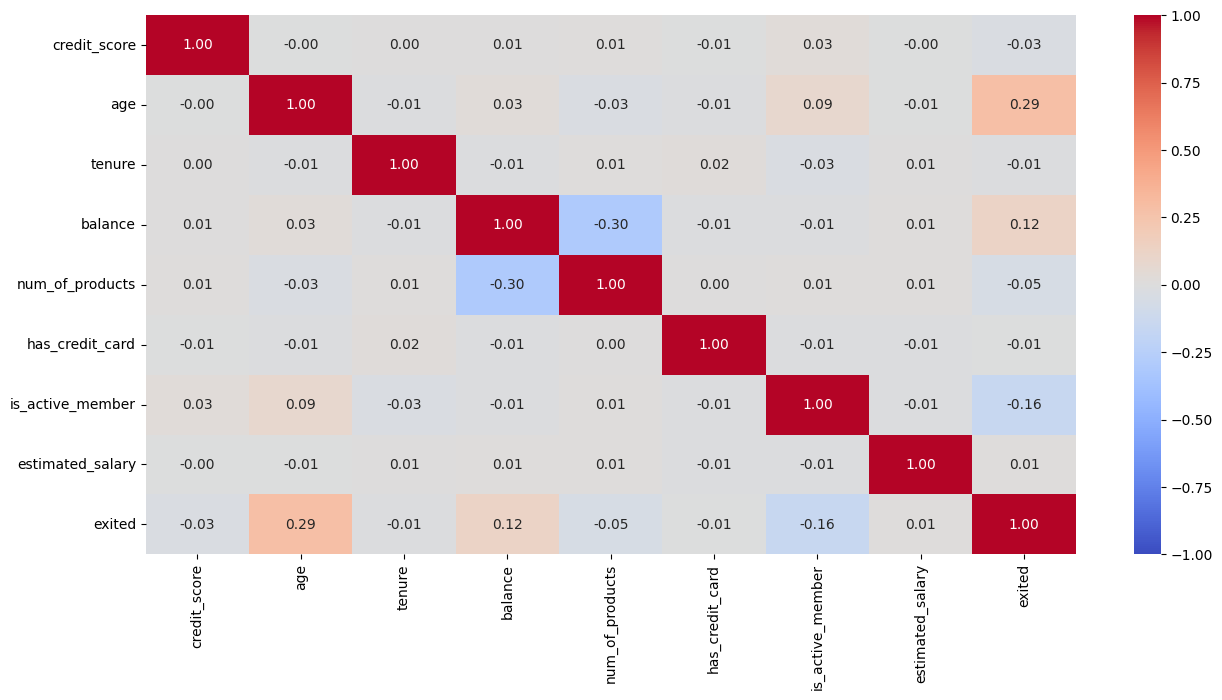

In [78]:
# Plot our correlations
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
)
plt.show()

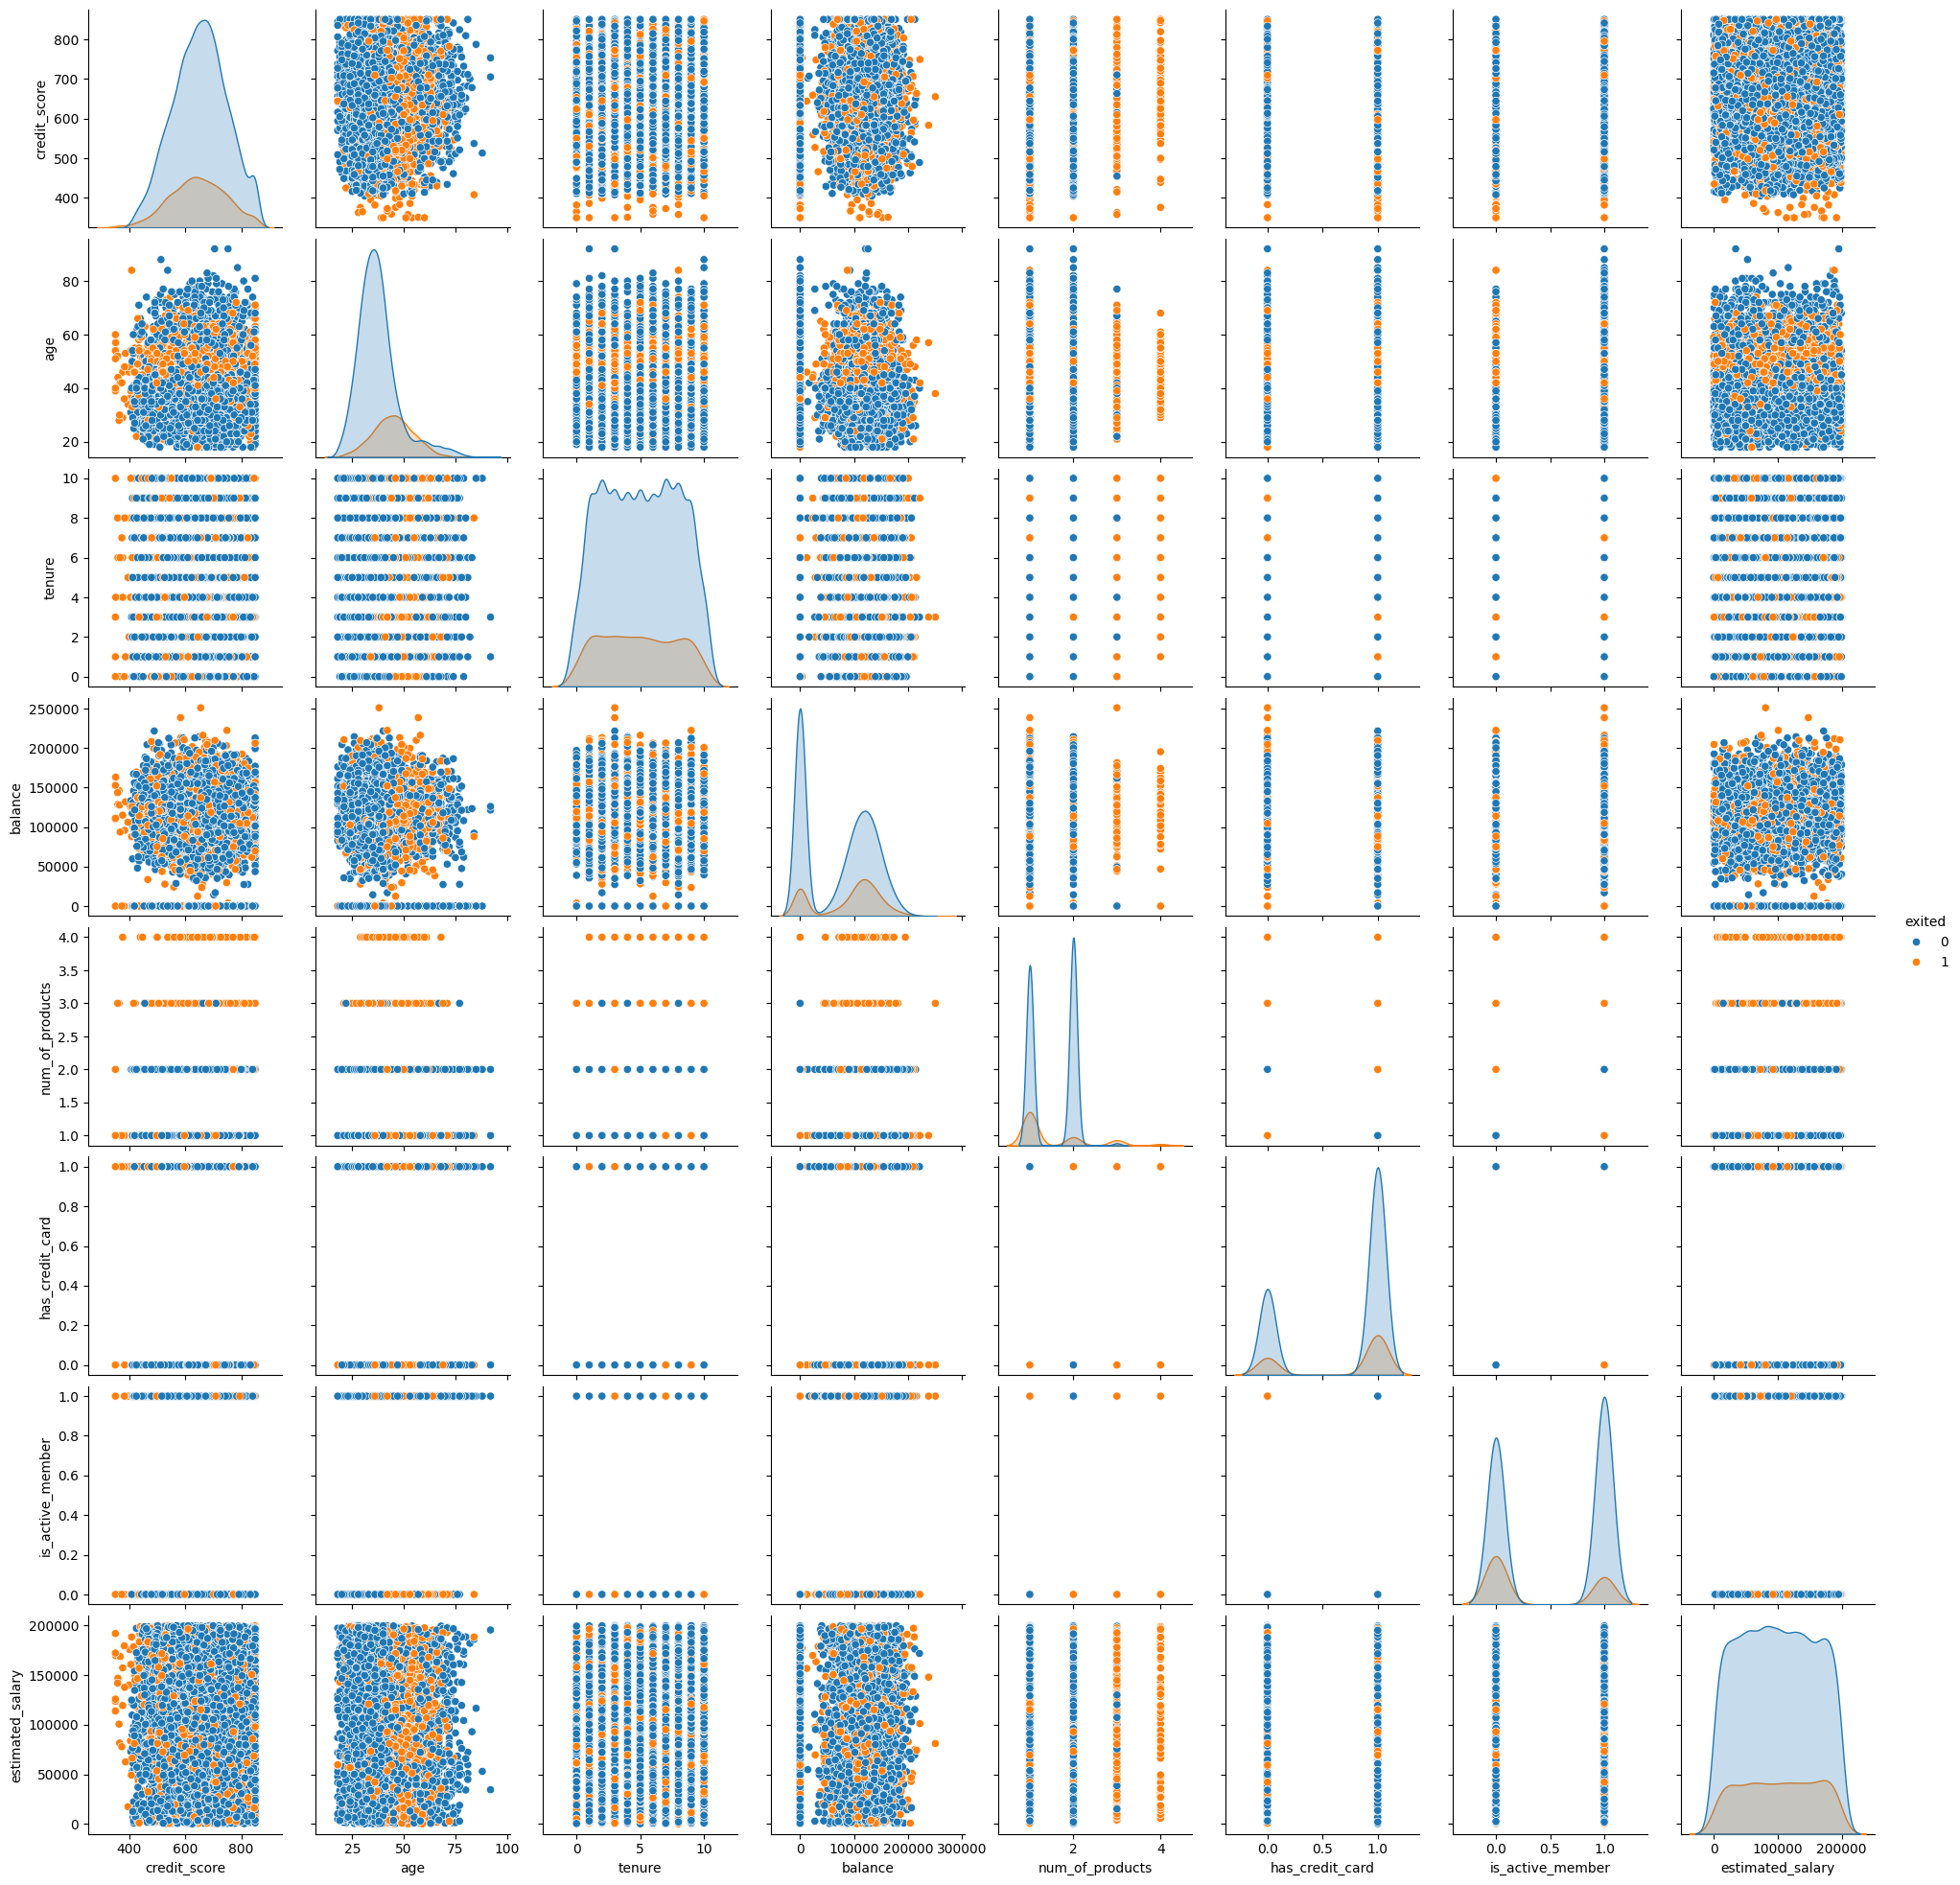

In [79]:
# Looking at the distributions
sns.pairplot(df, diag_kind="kde", hue="exited")
plt.show()